# Extracting information from data

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
df = pd.read_csv('full_data.csv')

def multiply_elements(elements_dict, multiplier):
    return {el: count * multiplier for el, count in elements_dict.items()}

def extract_elements(formula):
    def parse_formula(formula):
        pattern = re.compile(r'([A-Z][a-z]*)(\d*)|(\()|(\))(\d*)')
        stack = [defaultdict(int)]
        
        for elem, count, open_paren, close_paren, group_count in pattern.findall(formula):
            if elem:  
                stack[-1][elem] += int(count) if count else 1
            elif open_paren:  
                stack.append(defaultdict(int))
            elif close_paren:  
                top = stack.pop()
                multiplier = int(group_count) if group_count else 1
                for el, cnt in top.items():
                    stack[-1][el] += cnt * multiplier
        
        return stack[0]
    
    return dict(parse_formula(formula))

df['formula'] = df['formula'].astype(str)
df['Elements'] = df['formula'].apply(extract_elements)
df_elements = pd.DataFrame(df['Elements'].tolist()).fillna(0)
df = df.drop(columns=['Elements'])

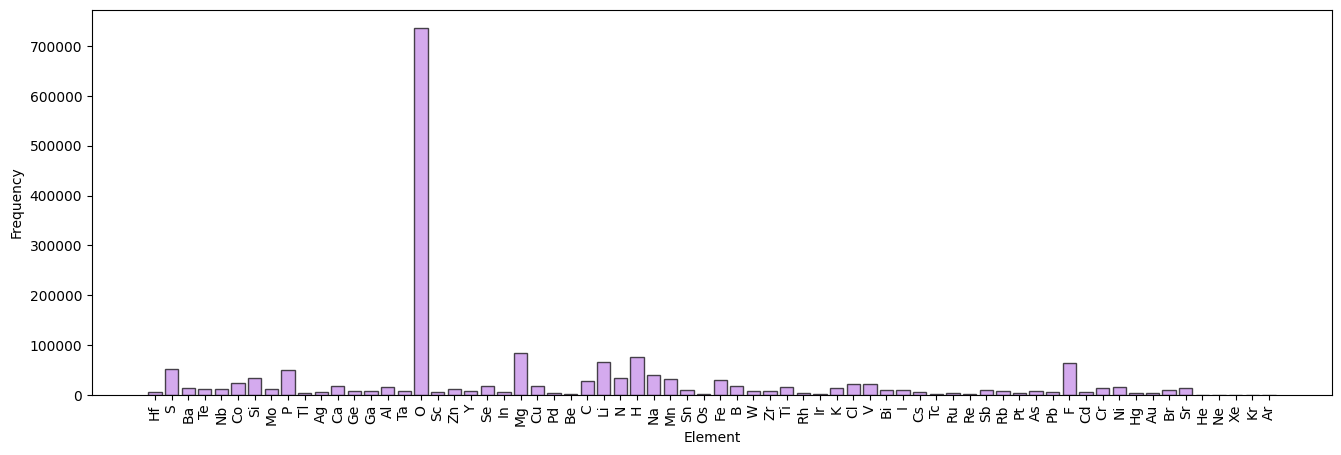

In [5]:
# Elements frequency

element_counts = df_elements.sum()

plt.figure(figsize=(16, 5))

plt.bar(element_counts.index, element_counts.values, alpha=0.7, color='#C287E8',edgecolor='black')
plt.xlabel('Element')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

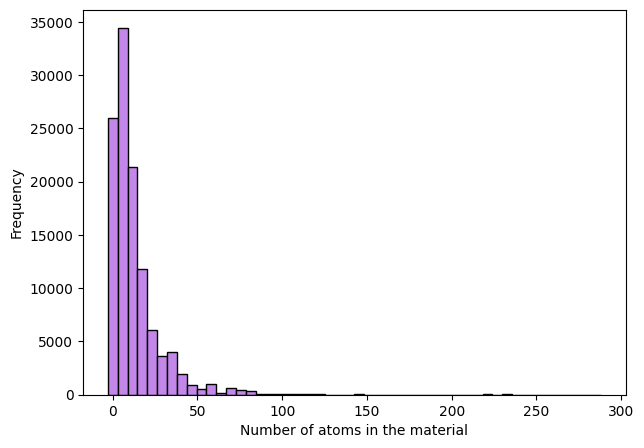

In [6]:
# Atoms in the material

total_atoms_per_material = df_elements.sum(axis=1)

plt.figure(figsize=(7, 5))
plt.hist(total_atoms_per_material, bins=50, edgecolor='black', align='left', color='#C287E8')
plt.xlabel('Number of atoms in the material')
plt.ylabel('Frequency')
plt.show()

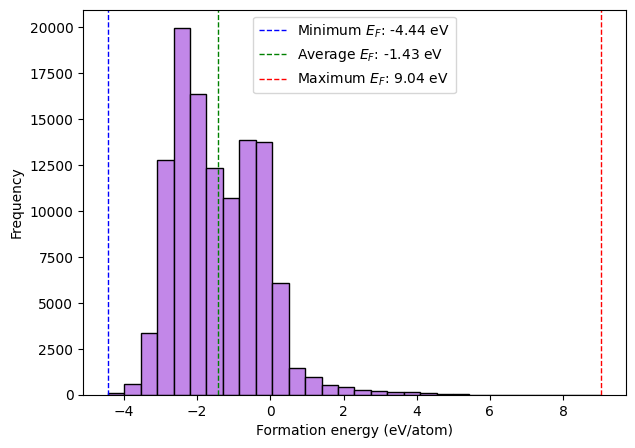

In [9]:
# Distribution of formation energies

ef_values = df['ef'].dropna()
ef_max = df['ef'].max()
ef_min = df['ef'].min()
ef_mean = ef_values.mean()

plt.figure(figsize=(7, 5))
plt.hist(ef_values, bins=30, edgecolor='black', color='#C287E8')
plt.xlabel('Formation energy (eV/atom)')
plt.ylabel('Frequency')

plt.axvline(ef_min, color='blue', linestyle='--', linewidth=1, label=f'Minimum $E_F$: {ef_min:.2f} eV')
plt.axvline(ef_mean, color='green', linestyle='--', linewidth=1, label=f'Average $E_F$: {ef_mean:.2f} eV')
plt.axvline(ef_max, color='red', linestyle='--', linewidth=1, label=f'Maximum $E_F$: {ef_max:.2f} eV')

plt.legend()
plt.show()